In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
data=pd.read_csv('/content/train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data['Loan_Status']=data['Loan_Status'].replace(['Y','N'],[1,0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


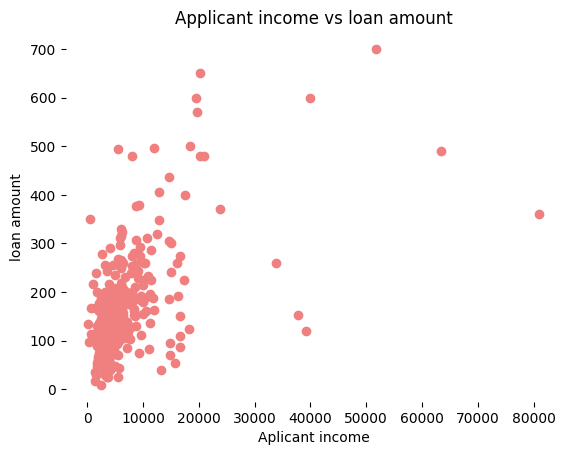

In [ ]:
# Relationship between Salary and Experience
plt.scatter(data['ApplicantIncome'], data['LoanAmount'], color = 'lightcoral')
plt.title('Applicant income vs loan amount')
plt.xlabel('Aplicant income')
plt.ylabel('loan amount')
plt.box(False)
plt.show()

In [ ]:
# prompt: create dataframe of data which contains LoanAmount, ApplicantIncome columns

loan_income_df_1= data[['LoanAmount', 'ApplicantIncome']]
print(loan_income_df_1)


     LoanAmount  ApplicantIncome
0           NaN             5849
1         128.0             4583
2          66.0             3000
3         120.0             2583
4         141.0             6000
..          ...              ...
609        71.0             2900
610        40.0             4106
611       253.0             8072
612       187.0             7583
613       133.0             4583

[614 rows x 2 columns]


In [ ]:
loan_income_df_2= data[['LoanAmount', 'ApplicantIncome']]
print(loan_income_df_2)

     LoanAmount  ApplicantIncome
0           NaN             5849
1         128.0             4583
2          66.0             3000
3         120.0             2583
4         141.0             6000
..          ...              ...
609        71.0             2900
610        40.0             4106
611       253.0             8072
612       187.0             7583
613       133.0             4583

[614 rows x 2 columns]


In [ ]:
# prompt: replace 'NaN' with 0 in 'LoanAmount clumn' in 'loan_income_df_1'

loan_income_df_1['LoanAmount'] = loan_income_df_1['LoanAmount'].fillna(0)
print(loan_income_df_1)


     LoanAmount  ApplicantIncome
0           0.0             5849
1         128.0             4583
2          66.0             3000
3         120.0             2583
4         141.0             6000
..          ...              ...
609        71.0             2900
610        40.0             4106
611       253.0             8072
612       187.0             7583
613       133.0             4583

[614 rows x 2 columns]


<ipython-input-83-b5fef8422ab2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_income_df_1['LoanAmount'] = loan_income_df_1['LoanAmount'].fillna(0)


In [ ]:
loan_income_df_1.isnull().sum()

LoanAmount         0
ApplicantIncome    0
dtype: int64

In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = loan_income_df_1[['ApplicantIncome','LoanAmount']]
y = data['Loan_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)


y_pred = logistic_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print performance measures
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)


Accuracy: 0.6504065040650406
Confusion Matrix:
 [[ 0 43]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mean=loan_income_df_2['LoanAmount'].mean()
print(mean)

146.41216216216216


In [ ]:
print(loan_income_df_2)

     LoanAmount  ApplicantIncome
0           NaN             5849
1         128.0             4583
2          66.0             3000
3         120.0             2583
4         141.0             6000
..          ...              ...
609        71.0             2900
610        40.0             4106
611       253.0             8072
612       187.0             7583
613       133.0             4583

[614 rows x 2 columns]


In [ ]:


loan_income_df_2['LoanAmount'].fillna(loan_income_df_2['LoanAmount'].mean(), inplace=True)
print(loan_income_df_2)

     LoanAmount  ApplicantIncome
0    146.412162             5849
1    128.000000             4583
2     66.000000             3000
3    120.000000             2583
4    141.000000             6000
..          ...              ...
609   71.000000             2900
610   40.000000             4106
611  253.000000             8072
612  187.000000             7583
613  133.000000             4583

[614 rows x 2 columns]


<ipython-input-88-eb360d46de80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_income_df_2['LoanAmount'].fillna(loan_income_df_2['LoanAmount'].mean(), inplace=True)


In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = loan_income_df_2[['ApplicantIncome','LoanAmount']]
y = data['Loan_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)


y_pred = logistic_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print performance measures
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)


Accuracy: 0.6504065040650406
Confusion Matrix:
 [[ 0 43]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
